In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
modified_data = pd.read_csv('term-deposit-marketing-after-outreach-variables.csv')
modified_data = modified_data.drop('y', axis=1)

In [3]:
modified_data.head()

,marital,education,default,housing,loan,contact,duration,age_group,y_encoded,balance_group,job_group,campaign_category_v2,month_period,day_category
0,married,tertiary,no,yes,no,unknown,4.35,age_42_to_60,0,balance_2000_to_4000,management_entrepreneur,campaign_1,mid_year,day_1_to_9
1,single,secondary,no,yes,no,unknown,2.52,age_42_to_60,0,balance_0_to_750,office_support,campaign_1,mid_year,day_1_to_9
2,married,secondary,no,yes,yes,unknown,1.27,age_33_to_42,0,balance_0_to_750,management_entrepreneur,campaign_1,mid_year,day_1_to_9
3,married,unknown,no,yes,no,unknown,1.53,age_42_to_60,0,balance_750_to_2000,manual_labor,campaign_1,mid_year,day_1_to_9
4,single,unknown,no,no,no,unknown,3.30,age_33_to_42,0,balance_0_to_750,not_working,campaign_1,mid_year,day_1_to_9


#### The 'day_category' feature has been found out to have very little distinction for the subscription rates between the different categories, so it might not be that important for the ML classification task.

In [4]:
modified_data = modified_data.drop(columns = ['day_category'], axis=1)

In [5]:
modified_data.head()

,marital,education,default,housing,loan,contact,duration,age_group,y_encoded,balance_group,job_group,campaign_category_v2,month_period
0,married,tertiary,no,yes,no,unknown,4.35,age_42_to_60,0,balance_2000_to_4000,management_entrepreneur,campaign_1,mid_year
1,single,secondary,no,yes,no,unknown,2.52,age_42_to_60,0,balance_0_to_750,office_support,campaign_1,mid_year
2,married,secondary,no,yes,yes,unknown,1.27,age_33_to_42,0,balance_0_to_750,management_entrepreneur,campaign_1,mid_year
3,married,unknown,no,yes,no,unknown,1.53,age_42_to_60,0,balance_750_to_2000,manual_labor,campaign_1,mid_year
4,single,unknown,no,no,no,unknown,3.30,age_33_to_42,0,balance_0_to_750,not_working,campaign_1,mid_year


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#get dummies for categorical variables before splitting
categorical_columns = modified_data.select_dtypes(include=['object']).columns 
numeric_columns = modified_data.select_dtypes(include=[np.number]).columns

# Convert categorical variables to dummy/indicator variables
modified_data = pd.get_dummies(modified_data, columns=categorical_columns, drop_first=True)

# Add 'customer_id' column based on the index
modified_data = modified_data.reset_index().rename(columns={'index': 'customer_id'})

# Split into train and test sets
train_df, test_df = train_test_split(modified_data, test_size=0.2, random_state=42, shuffle=True)

# Reset index for both sets
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [7]:
modified_data.head()

,customer_id,duration,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,...,balance_group_balance_under_0,job_group_manual_labor,job_group_not_working,job_group_office_support,campaign_category_v2_campaign_2,campaign_category_v2_campaign_3,campaign_category_v2_campaign_gt10,campaign_category_v2_campaign_mt3_lt11,month_period_mid_year,month_period_start_year
0,0,4.35,0,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,1,2.52,0,False,True,True,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2,2,1.27,0,True,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,3,1.53,0,True,False,False,False,True,False,True,...,False,True,False,False,False,False,False,False,True,False
4,4,3.30,0,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [8]:
train_df.head()

,customer_id,duration,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,...,balance_group_balance_under_0,job_group_manual_labor,job_group_not_working,job_group_office_support,campaign_category_v2_campaign_2,campaign_category_v2_campaign_3,campaign_category_v2_campaign_gt10,campaign_category_v2_campaign_mt3_lt11,month_period_mid_year,month_period_start_year
0,19066,3.08,0,True,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,True,False
1,13625,2.27,0,True,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
2,34164,2.43,0,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
3,36675,2.90,0,True,False,True,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False
4,2165,6.43,0,False,True,True,False,False,False,True,...,True,False,False,True,True,False,False,False,True,False


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31360 entries, 0 to 31359
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             31360 non-null  int64  
 1   duration                                31360 non-null  float64
 2   y_encoded                               31360 non-null  int64  
 3   marital_married                         31360 non-null  bool   
 4   marital_single                          31360 non-null  bool   
 5   education_secondary                     31360 non-null  bool   
 6   education_tertiary                      31360 non-null  bool   
 7   education_unknown                       31360 non-null  bool   
 8   default_yes                             31360 non-null  bool   
 9   housing_yes                             31360 non-null  bool   
 10  loan_yes                                31360 non-null  bo

In [10]:
test_df.head()

,customer_id,duration,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,...,balance_group_balance_under_0,job_group_manual_labor,job_group_not_working,job_group_office_support,campaign_category_v2_campaign_2,campaign_category_v2_campaign_3,campaign_category_v2_campaign_gt10,campaign_category_v2_campaign_mt3_lt11,month_period_mid_year,month_period_start_year
0,9992,5.32,0,False,True,True,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
1,28956,1.08,0,False,True,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
2,16224,1.30,0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,18492,1.35,0,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,24095,25.52,0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7840 entries, 0 to 7839
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             7840 non-null   int64  
 1   duration                                7840 non-null   float64
 2   y_encoded                               7840 non-null   int64  
 3   marital_married                         7840 non-null   bool   
 4   marital_single                          7840 non-null   bool   
 5   education_secondary                     7840 non-null   bool   
 6   education_tertiary                      7840 non-null   bool   
 7   education_unknown                       7840 non-null   bool   
 8   default_yes                             7840 non-null   bool   
 9   housing_yes                             7840 non-null   bool   
 10  loan_yes                                7840 non-null   bool

In [12]:
# Drop columns from train_df whose names start with specified prefixes or are 'y'
drop_prefixes = ['contact', 'month_period', 'duration', 'campaign_category']
cols_to_drop = [col for col in train_df.columns if any(col.startswith(prefix) for prefix in drop_prefixes) or col == 'y']

background_df = train_df.drop(columns=cols_to_drop)
background_df.head()

,customer_id,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,age_group_age_42_to_60,age_group_over_60,age_group_under_33,balance_group_balance_2000_to_4000,balance_group_balance_750_to_2000,balance_group_balance_over_4000,balance_group_balance_under_0,job_group_manual_labor,job_group_not_working,job_group_office_support
0,19066,0,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True
1,13625,0,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
2,34164,0,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False
3,36675,0,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
4,2165,0,False,True,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True


In [13]:
test_df.to_csv('test_modifed.csv', index=False)

In [14]:
train_df['y_encoded'].value_counts()

y_encoded
0    29090
1     2270
Name: count, dtype: int64

In [15]:
test_df['y_encoded'].value_counts()

y_encoded
0    7264
1     576
Name: count, dtype: int64

In [16]:
background_df.head()

,customer_id,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,age_group_age_42_to_60,age_group_over_60,age_group_under_33,balance_group_balance_2000_to_4000,balance_group_balance_750_to_2000,balance_group_balance_over_4000,balance_group_balance_under_0,job_group_manual_labor,job_group_not_working,job_group_office_support
0,19066,0,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True
1,13625,0,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
2,34164,0,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False
3,36675,0,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
4,2165,0,False,True,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True


In [17]:
from sklearn.model_selection import train_test_split

# Drop 'customer_id' column
background_features = background_df.drop('customer_id', axis=1)


# Split into train and validation sets
bg_train_df, bg_val_df = train_test_split(background_features, test_size=0.2, random_state=42, shuffle=True)

# Reset index for both sets
# bg_train_df = bg_train_df.reset_index(drop=True)
# bg_val_df = bg_val_df.reset_index(drop=True)

In [18]:
print(f"Duplicates in background_df: {background_df.duplicated().sum()}")

Duplicates in background_df: 0


In [19]:
bg_train_df.head()

,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,age_group_age_42_to_60,age_group_over_60,age_group_under_33,balance_group_balance_2000_to_4000,balance_group_balance_750_to_2000,balance_group_balance_over_4000,balance_group_balance_under_0,job_group_manual_labor,job_group_not_working,job_group_office_support
27352,1,True,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True
11414,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
3021,0,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True
459,0,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
8670,1,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [20]:
bg_val_df.head()

,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,age_group_age_42_to_60,age_group_over_60,age_group_under_33,balance_group_balance_2000_to_4000,balance_group_balance_750_to_2000,balance_group_balance_over_4000,balance_group_balance_under_0,job_group_manual_labor,job_group_not_working,job_group_office_support
18486,0,True,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False
2718,0,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False
15388,0,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True
28883,0,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True
26362,0,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True


create a hyperparameter tuing piepline for a xgb classifier model by training on bg_train_df and testing on bg_val_df, where the output is the y_encoded feature. The output I require is the output probability instead of the label.

In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.utils.class_weight import compute_sample_weight, compute_class_weight
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Prepare features and target
X_train = bg_train_df.drop('y_encoded', axis=1)
y_train = bg_train_df['y_encoded']
X_val = bg_val_df.drop('y_encoded', axis=1)
y_val = bg_val_df['y_encoded']

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Compute class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))
sample_weights = y_train.map(class_weight_dict)

In [22]:
# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [1000, 1500],
    'max_depth': [3, 5, None],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

xgb_cls = XGBClassifier(
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

random_search = RandomizedSearchCV(
    estimator=xgb_cls,
    param_distributions=param_dist,
    n_iter=40,
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_scaled, y_train, sample_weight=sample_weights)

import joblib

# Save the trained XGBProbaClassifier model to a file
joblib.dump(random_search.best_estimator_, 'xgb_initial_proba_model_all_features.joblib')

# Get feature importances from the trained XGBRegressor
best_model = random_search.best_estimator_

print("Best parameters:", random_search.best_params_)
print("Best AUC score (CV):", random_search.best_score_)

# Predict probabilities on validation set
y_pred_proba = best_model.predict_proba(X_val_scaled)[:, 1]

# Evaluate AUC on validation set
auc_val = roc_auc_score(y_val, y_pred_proba)
print(f"Validation AUC: {auc_val:.4f}")

# Show first few probabilities
print(y_pred_proba[:10])

importances = best_model.feature_importances_


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.7}
Best AUC score (CV): 0.616104653404074
Validation AUC: 0.5955
[0.41046816 0.41096023 0.4299895  0.5164478  0.5600017  0.42411977
 0.38599306 0.3529499  0.3807193  0.5853745 ]


C:\Users\samar\AppData\Local\Temp\ipykernel_8988\397700701.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(15), x='importance', y='feature', palette='viridis')


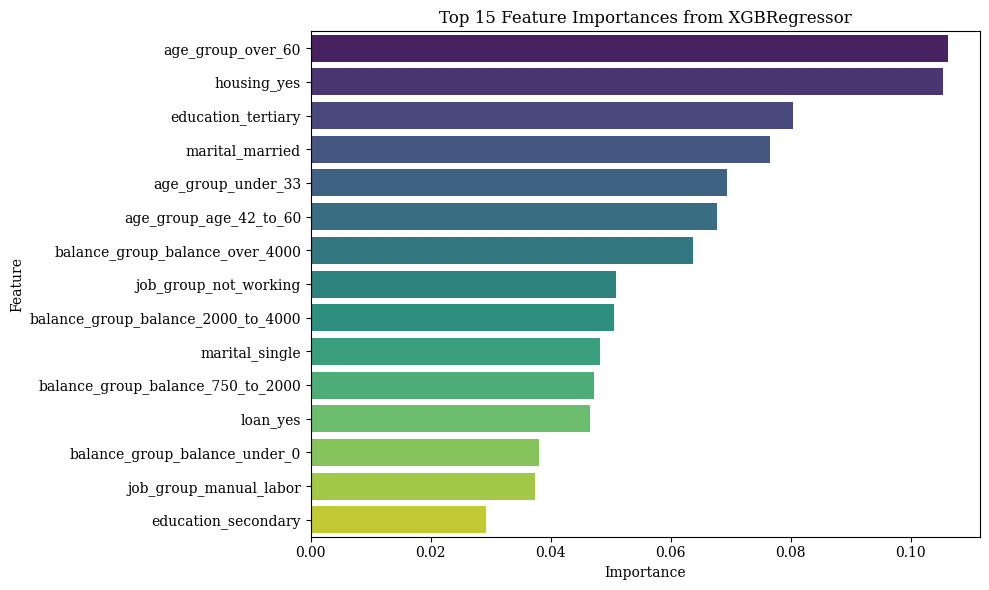

In [23]:
feature_names = X_train.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances from XGBRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [24]:
X_train.head()

,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,age_group_age_42_to_60,age_group_over_60,age_group_under_33,balance_group_balance_2000_to_4000,balance_group_balance_750_to_2000,balance_group_balance_over_4000,balance_group_balance_under_0,job_group_manual_labor,job_group_not_working,job_group_office_support
27352,True,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True
11414,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
3021,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True
459,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
8670,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [25]:
# Predict subscription probability for train and validation sets
X_train['subscription_proba'] = best_model.predict_proba(X_train)[:, 1]
X_val['subscription_proba'] = best_model.predict_proba(X_val)[:,1]

# Create copies and add customer_id directly with proper mapping
X_train_with_id = X_train.copy()
X_val_with_id = X_val.copy()

# Map customer_id directly from background_df using the indices
X_train_with_id['customer_id'] = [background_df.iloc[idx]['customer_id'] for idx in bg_train_df.index]
X_val_with_id['customer_id'] = [background_df.iloc[idx]['customer_id'] for idx in bg_val_df.index]

# Concatenate train and validation predictions
subscription_proba_df = pd.concat([
    X_train_with_id[['customer_id', 'subscription_proba']],
    X_val_with_id[['customer_id', 'subscription_proba']]
], ignore_index=True)

print(subscription_proba_df.head())

# Check for duplicates before merging
print(f"Duplicates in subscription_proba_df: {subscription_proba_df.duplicated().sum()}")


   customer_id  subscription_proba
0        23559            0.383862
1         4719            0.383926
2        31205            0.383926
3        38769            0.516784
4        18145            0.508243
Duplicates in subscription_proba_df: 0


In [26]:
subscription_proba_df[subscription_proba_df.duplicated()==True]

,customer_id,subscription_proba


In [27]:
# Remove duplicates if any exist
subscription_proba_df = subscription_proba_df.drop_duplicates(subset='customer_id', keep='first')

# Merge with train_df
train_df = train_df.merge(subscription_proba_df, on='customer_id', how='left')
train_df.head()

,customer_id,duration,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,...,job_group_manual_labor,job_group_not_working,job_group_office_support,campaign_category_v2_campaign_2,campaign_category_v2_campaign_3,campaign_category_v2_campaign_gt10,campaign_category_v2_campaign_mt3_lt11,month_period_mid_year,month_period_start_year,subscription_proba
0,19066,3.08,0,True,False,False,True,False,False,False,...,False,False,True,True,False,False,False,True,False,0.449120
1,13625,2.27,0,True,False,True,False,False,False,True,...,True,False,False,False,False,False,False,True,False,0.383862
2,34164,2.43,0,True,False,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,0.383926
3,36675,2.90,0,True,False,True,False,False,False,True,...,False,True,False,True,False,False,False,True,False,0.383862
4,2165,6.43,0,False,True,True,False,False,False,True,...,False,False,True,True,False,False,False,True,False,0.465682


In [30]:
# Drop columns from train_df whose names start with specified prefixes
drop_prefixes_new = []
cols_to_drop_new = [col for col in train_df.columns if any(col.startswith(prefix) for prefix in drop_prefixes_new)]

train_df_reduced = train_df.drop(columns=cols_to_drop_new)
train_df_reduced.head()

,customer_id,duration,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,...,job_group_manual_labor,job_group_not_working,job_group_office_support,campaign_category_v2_campaign_2,campaign_category_v2_campaign_3,campaign_category_v2_campaign_gt10,campaign_category_v2_campaign_mt3_lt11,month_period_mid_year,month_period_start_year,subscription_proba
0,19066,3.08,0,True,False,False,True,False,False,False,...,False,False,True,True,False,False,False,True,False,0.449120
1,13625,2.27,0,True,False,True,False,False,False,True,...,True,False,False,False,False,False,False,True,False,0.383862
2,34164,2.43,0,True,False,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,0.383926
3,36675,2.90,0,True,False,True,False,False,False,True,...,False,True,False,True,False,False,False,True,False,0.383862
4,2165,6.43,0,False,True,True,False,False,False,True,...,False,False,True,True,False,False,False,True,False,0.465682


In [31]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score
import numpy as np

# Prepare features and target
X_cls = train_df_reduced.drop(['customer_id', 'y_encoded'], axis=1)
y_cls = train_df_reduced['y_encoded']

# Split into train and validation sets
X_train_cls, X_val_cls, y_train_cls, y_val_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

In [48]:
X_train_cls.columns

Index(['duration', 'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown',
       'age_group_age_42_to_60', 'age_group_over_60', 'age_group_under_33',
       'balance_group_balance_2000_to_4000',
       'balance_group_balance_750_to_2000', 'balance_group_balance_over_4000',
       'balance_group_balance_under_0', 'job_group_manual_labor',
       'job_group_not_working', 'job_group_office_support',
       'campaign_category_v2_campaign_2', 'campaign_category_v2_campaign_3',
       'campaign_category_v2_campaign_gt10',
       'campaign_category_v2_campaign_mt3_lt11', 'month_period_mid_year',
       'month_period_start_year', 'subscription_proba'],
      dtype='object')

### Using recall

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import joblib

# Scale 'duration' feature for train and validation sets
X_train_cls_scaled = X_train_cls.copy()
X_val_cls_scaled = X_val_cls.copy()

scaler2 = StandardScaler()
X_train_cls_scaled = scaler2.fit_transform(X_train_cls)
X_val_cls_scaled = scaler2.transform(X_val_cls)

# Compute class weights
classes = np.unique(y_train_cls)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_cls)
class_weight_dict = dict(zip(classes, class_weights))
sample_weights = y_train_cls.map(class_weight_dict)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [1000, 1500, 2000],
    'max_depth': [3, 5, None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

xgb_cls = XGBClassifier(
    random_state=42,
    eval_metric = 'logloss'
)


random_search = RandomizedSearchCV(
    estimator=xgb_cls,
    param_distributions=param_dist,
    n_iter=50,
    scoring='recall',
    n_jobs=4,
    cv=5,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_cls_scaled, y_train_cls, sample_weight=sample_weights)

# Save the best model
joblib.dump(random_search.best_estimator_, 'xgb_cls_model_recall_all_features_extra.joblib')
best_model = joblib.load('xgb_cls_model_recall_all_features_extra.joblib')

# Predict on validation set
y_pred_val = random_search.best_estimator_.predict(X_val_cls_scaled)

print("Best parameters:", random_search.best_params_)
print("Validation recall:", recall_score(y_val_cls, y_pred_val))
print("Validation accuracy:", accuracy_score(y_val_cls, y_pred_val))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 1.0, 'n_estimators': 1500, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 1.0}
Validation recall: 0.8171806167400881
Validation accuracy: 0.8348214285714286


C:\Users\samar\AppData\Local\Temp\ipykernel_8988\2419035125.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')


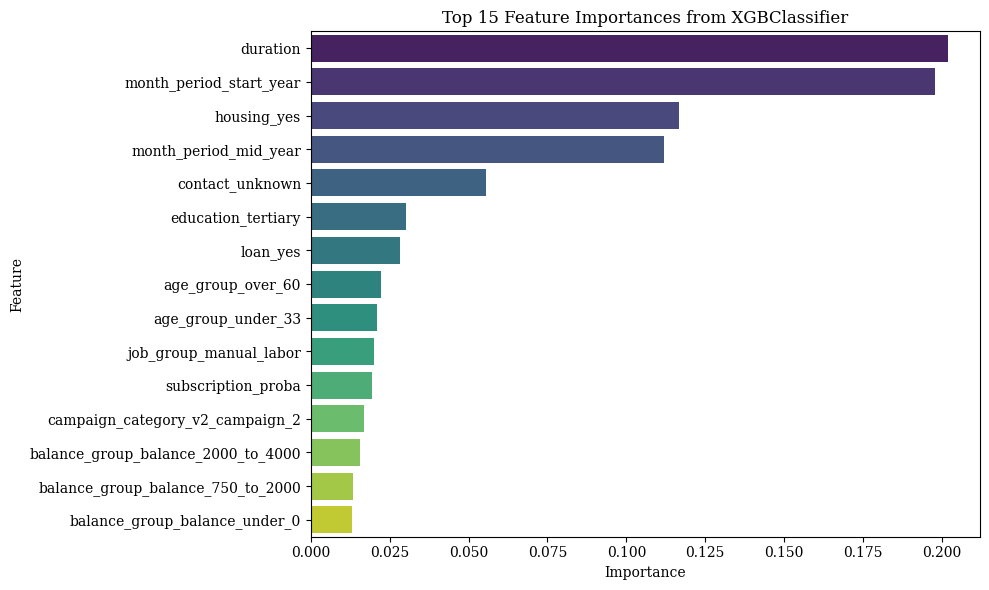

In [33]:
# Get feature importances from the best XGBClassifier model (random_search.best_estimator_)
cls_feature_importances = best_model.feature_importances_
cls_feature_names = X_train_cls.columns

# Create a DataFrame for visualization
cls_feat_imp_df = pd.DataFrame({
    'feature': cls_feature_names,
    'importance': cls_feature_importances
}).sort_values(by='importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances from XGBClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Confusion Matrix:
[[4865  953]
 [  83  371]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      5818
           1       0.28      0.82      0.42       454

    accuracy                           0.83      6272
   macro avg       0.63      0.83      0.66      6272
weighted avg       0.93      0.83      0.87      6272



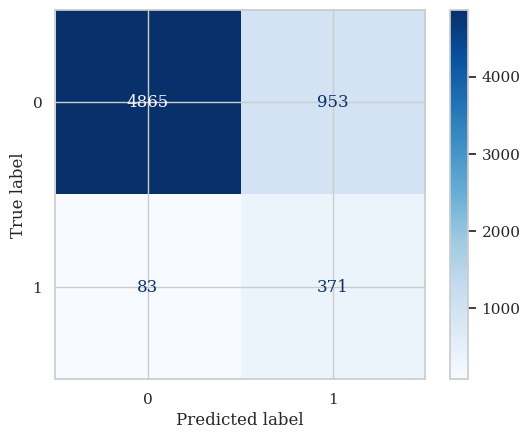

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'serif'

# Save the best model
# joblib.dump(random_search.best_estimator_, 'xgb_cls_best_model.joblib')

# Predict on validation set
y_pred_val_cls = best_model.predict(X_val_cls_scaled)

# Confusion matrix
cm = confusion_matrix(y_val_cls, y_pred_val_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_search.best_estimator_.classes_)
disp.plot(cmap='Blues')
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_val_cls, y_pred_val_cls)
print("Classification Report:")
print(report)

In [38]:
# Read the test data
test_data = pd.read_csv('test_modifed.csv')

test_data.head()

,customer_id,duration,y_encoded,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,...,balance_group_balance_under_0,job_group_manual_labor,job_group_not_working,job_group_office_support,campaign_category_v2_campaign_2,campaign_category_v2_campaign_3,campaign_category_v2_campaign_gt10,campaign_category_v2_campaign_mt3_lt11,month_period_mid_year,month_period_start_year
0,9992,5.32,0,False,True,True,False,False,False,False,...,False,False,False,True,False,False,False,True,True,False
1,28956,1.08,0,False,True,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,True
2,16224,1.30,0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,18492,1.35,0,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,24095,25.52,0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
test_data.columns

Index(['customer_id', 'duration', 'y_encoded', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'age_group_age_42_to_60',
       'age_group_over_60', 'age_group_under_33',
       'balance_group_balance_2000_to_4000',
       'balance_group_balance_750_to_2000', 'balance_group_balance_over_4000',
       'balance_group_balance_under_0', 'job_group_manual_labor',
       'job_group_not_working', 'job_group_office_support',
       'campaign_category_v2_campaign_2', 'campaign_category_v2_campaign_3',
       'campaign_category_v2_campaign_gt10',
       'campaign_category_v2_campaign_mt3_lt11', 'month_period_mid_year',
       'month_period_start_year'],
      dtype='object')

In [50]:
import joblib

# Read the test data
test_data = pd.read_csv('test_modifed.csv')
test_X = test_data.drop(['y_encoded', 'customer_id'], axis=1)

# Features for subscription probability prediction
proba_features = [
    'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown',
    'default_yes', 'housing_yes', 'loan_yes', 'age_group_age_42_to_60','age_group_over_60',
    'age_group_under_33', 'balance_group_balance_2000_to_4000',
    'balance_group_balance_750_to_2000', 'balance_group_balance_over_4000',
    'balance_group_balance_under_0', 'job_group_manual_labor', 'job_group_not_working', 'job_group_office_support'
]

# Load the trained XGBRegressor model for subscription probability
xgb_prob_loaded = joblib.load('xgb_initial_proba_model_all_features.joblib')

# Predict subscription probability
test_data['subscription_proba'] = xgb_prob_loaded.predict_proba(scaler.transform(test_X[proba_features]))[:, 1]
test_X = test_data.copy()
test_X = test_X.drop(['y_encoded', 'customer_id'], axis=1)   

# Features for classification
cls_features = test_X.columns

# Load the trained XGBClassifier model
xgb_cls_loaded = joblib.load('xgb_cls_model_recall_all_features_extra.joblib')

# Predict classification results
test_data['y_pred'] = xgb_cls_loaded.predict(scaler2.transform(test_X[cls_features]))

# Show the first few predictions
test_data[['customer_id','y_pred', 'subscription_proba']].head()

,customer_id,y_pred,subscription_proba
0,9992,0,0.448363
1,28956,1,0.739415
2,16224,0,0.583719
3,18492,0,0.622390
4,24095,1,0.583719


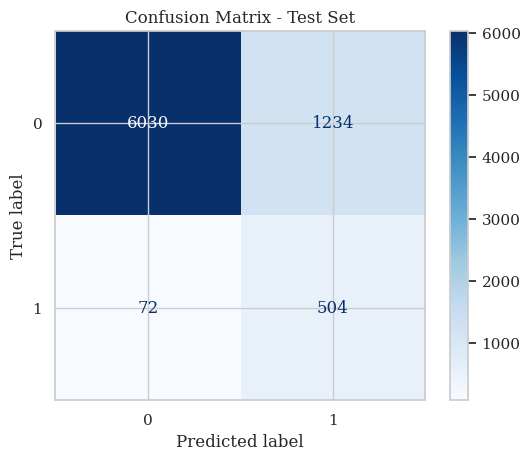

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7264
           1       0.29      0.88      0.44       576

    accuracy                           0.83      7840
   macro avg       0.64      0.85      0.67      7840
weighted avg       0.94      0.83      0.87      7840



In [51]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute confusion matrix and classification report for test set
cm_test = confusion_matrix(test_data['y_encoded'], test_data['y_pred'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

# Print classification report
report_test = classification_report(test_data['y_encoded'], test_data['y_pred'])
print("Classification Report - Test Set:")
print(report_test)

### Using accuracy

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 1500, 'max_depth': None, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 1.0}
Validation recall: 0.41409691629955947
Validation accuracy: 0.907844387755102


C:\Users\samar\AppData\Local\Temp\ipykernel_8988\494858023.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')


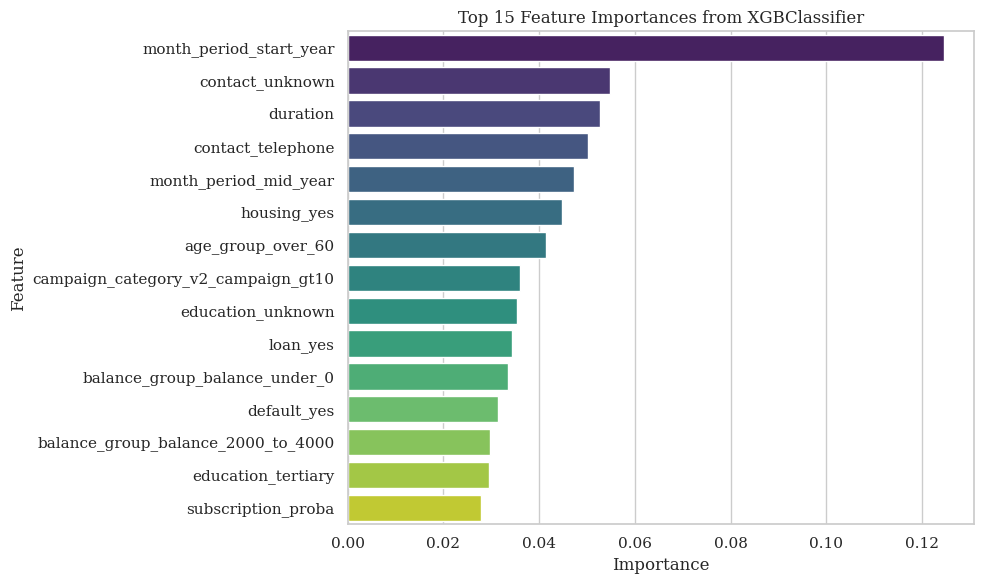

Confusion Matrix:
[[5506  312]
 [ 266  188]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5818
           1       0.38      0.41      0.39       454

    accuracy                           0.91      6272
   macro avg       0.66      0.68      0.67      6272
weighted avg       0.91      0.91      0.91      6272



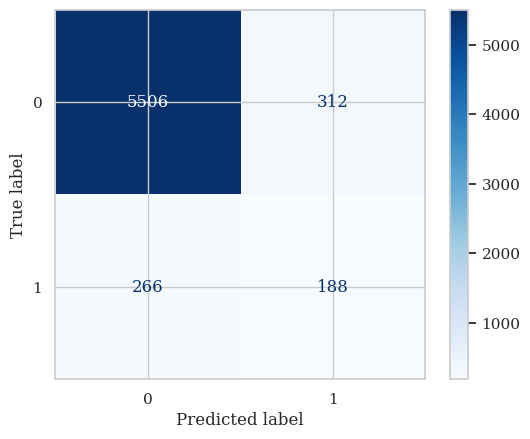

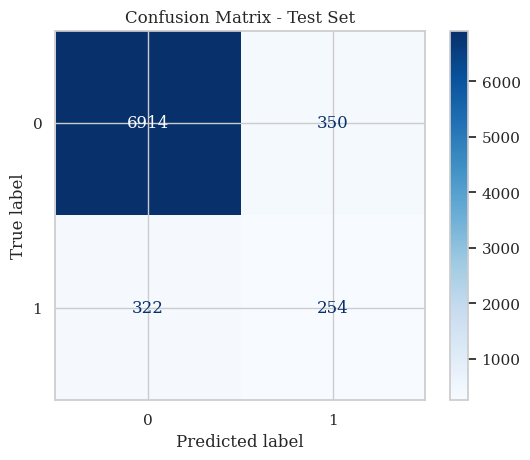

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7264
           1       0.42      0.44      0.43       576

    accuracy                           0.91      7840
   macro avg       0.69      0.70      0.69      7840
weighted avg       0.92      0.91      0.92      7840



In [52]:
# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [1000, 1500, 2000],
    'max_depth': [3, 5, None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

xgb_cls = XGBClassifier(
    random_state=42,
    eval_metric = 'logloss'
)


random_search = RandomizedSearchCV(
    estimator=xgb_cls,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    n_jobs=4,
    cv=5,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_cls_scaled, y_train_cls, sample_weight=sample_weights)

# Save the best model
joblib.dump(random_search.best_estimator_, 'xgb_cls_model_accuracy_all_features_extra.joblib')
best_model = joblib.load('xgb_cls_model_accuracy_all_features_extra.joblib')

# Predict on validation set
y_pred_val = random_search.best_estimator_.predict(X_val_cls_scaled)

print("Best parameters:", random_search.best_params_)
print("Validation recall:", recall_score(y_val_cls, y_pred_val))
print("Validation accuracy:", accuracy_score(y_val_cls, y_pred_val))

# Get feature importances from the best XGBClassifier model (random_search.best_estimator_)
cls_feature_importances = best_model.feature_importances_
cls_feature_names = X_train_cls.columns

# Create a DataFrame for visualization
cls_feat_imp_df = pd.DataFrame({
    'feature': cls_feature_names,
    'importance': cls_feature_importances
}).sort_values(by='importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances from XGBClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Predict on validation set
y_pred_val_cls = best_model.predict(X_val_cls_scaled)

# Confusion matrix
cm = confusion_matrix(y_val_cls, y_pred_val_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_search.best_estimator_.classes_)
disp.plot(cmap='Blues')
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_val_cls, y_pred_val_cls)
print("Classification Report:")
print(report)

test_data = pd.read_csv('test_modifed.csv')

# Load the trained XGBRegressor model for subscription probability
xgb_prob_loaded = joblib.load('xgb_initial_proba_model_all_features.joblib')

# Predict subscription probability
test_data['subscription_proba'] = xgb_prob_loaded.predict_proba(scaler.transform(test_data[proba_features]))[:, 1]


# Load the trained XGBClassifier model
xgb_cls_loaded = joblib.load('xgb_cls_model_accuracy_all_features_extra.joblib')

# Predict classification results
test_data['y_pred'] = xgb_cls_loaded.predict(scaler2.transform(test_data[cls_features]))

# Compute confusion matrix and classification report for test set
cm_test = confusion_matrix(test_data['y_encoded'], test_data['y_pred'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

# Print classification report
report_test = classification_report(test_data['y_encoded'], test_data['y_pred'])
print("Classification Report - Test Set:")
print(report_test)

### Using AOC

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.7, 'n_estimators': 1500, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Validation recall: 0.8237885462555066
Validation accuracy: 0.8404017857142857


C:\Users\samar\AppData\Local\Temp\ipykernel_8988\331291038.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')


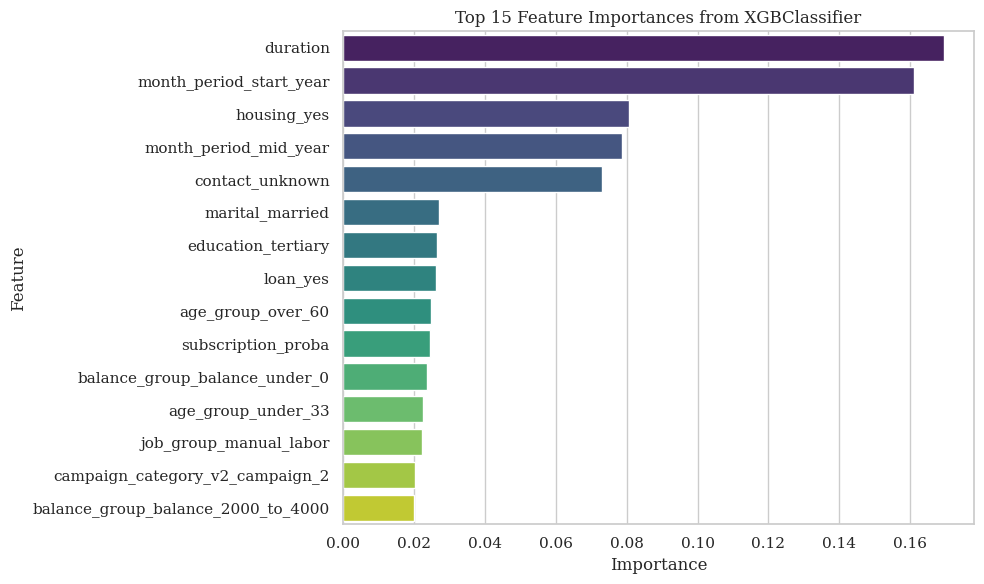

Confusion Matrix:
[[4897  921]
 [  80  374]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      5818
           1       0.29      0.82      0.43       454

    accuracy                           0.84      6272
   macro avg       0.64      0.83      0.67      6272
weighted avg       0.93      0.84      0.87      6272



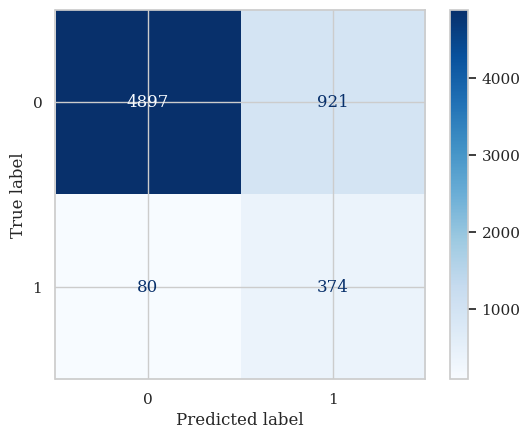

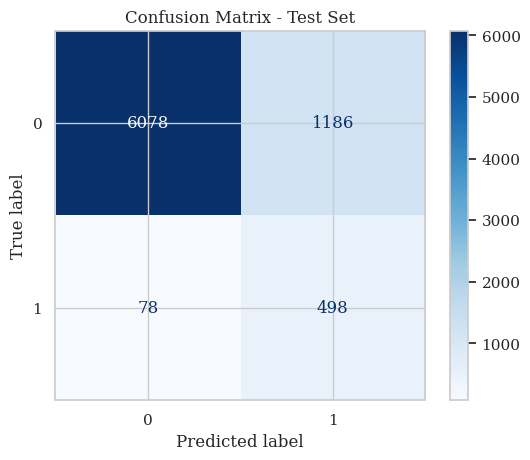

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7264
           1       0.30      0.86      0.44       576

    accuracy                           0.84      7840
   macro avg       0.64      0.85      0.67      7840
weighted avg       0.94      0.84      0.87      7840



In [53]:
# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [1000, 1500, 2000],
    'max_depth': [3, 5, None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

xgb_cls = XGBClassifier(
    random_state=42,
    eval_metric = 'auc'
)


random_search = RandomizedSearchCV(
    estimator=xgb_cls,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_cls_scaled, y_train_cls, sample_weight=sample_weights)

# Save the best model
joblib.dump(random_search.best_estimator_, 'xgb_cls_model_auc_all_features_extra.joblib')
best_model = joblib.load('xgb_cls_model_auc_all_features_extra.joblib')

# Predict on validation set
y_pred_val = random_search.best_estimator_.predict(X_val_cls_scaled)

print("Best parameters:", random_search.best_params_)
print("Validation recall:", recall_score(y_val_cls, y_pred_val))
print("Validation accuracy:", accuracy_score(y_val_cls, y_pred_val))

# Get feature importances from the best XGBClassifier model (random_search.best_estimator_)
cls_feature_importances = best_model.feature_importances_
cls_feature_names = X_train_cls.columns

# Create a DataFrame for visualization
cls_feat_imp_df = pd.DataFrame({
    'feature': cls_feature_names,
    'importance': cls_feature_importances
}).sort_values(by='importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=cls_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances from XGBClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Predict on validation set
y_pred_val_cls = best_model.predict(X_val_cls_scaled)

# Confusion matrix
cm = confusion_matrix(y_val_cls, y_pred_val_cls)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_search.best_estimator_.classes_)
disp.plot(cmap='Blues')
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_val_cls, y_pred_val_cls)
print("Classification Report:")
print(report)

test_data = pd.read_csv('test_modifed.csv')

# Load the trained XGBRegressor model for subscription probability
xgb_prob_loaded = joblib.load('xgb_initial_proba_model_all_features.joblib')


# Predict subscription probability
test_data['subscription_proba'] = xgb_prob_loaded.predict_proba(scaler.transform(test_data[proba_features]))[:, 1]


# Load the trained XGBClassifier model
xgb_cls_loaded = joblib.load('xgb_cls_model_auc_all_features_extra.joblib')

# Predict classification results
test_data['y_pred'] = xgb_cls_loaded.predict(scaler2.transform(test_data[cls_features]))

# Compute confusion matrix and classification report for test set
cm_test = confusion_matrix(test_data['y_encoded'], test_data['y_pred'])
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()

# Print classification report
report_test = classification_report(test_data['y_encoded'], test_data['y_pred'])
print("Classification Report - Test Set:")
print(report_test)

C:\Users\samar\AppData\Local\Temp\ipykernel_8988\2536544477.py:78: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.9)  # Adjust title position
C:\Users\samar\AppData\Local\Temp\ipykernel_8988\2536544477.py:79: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


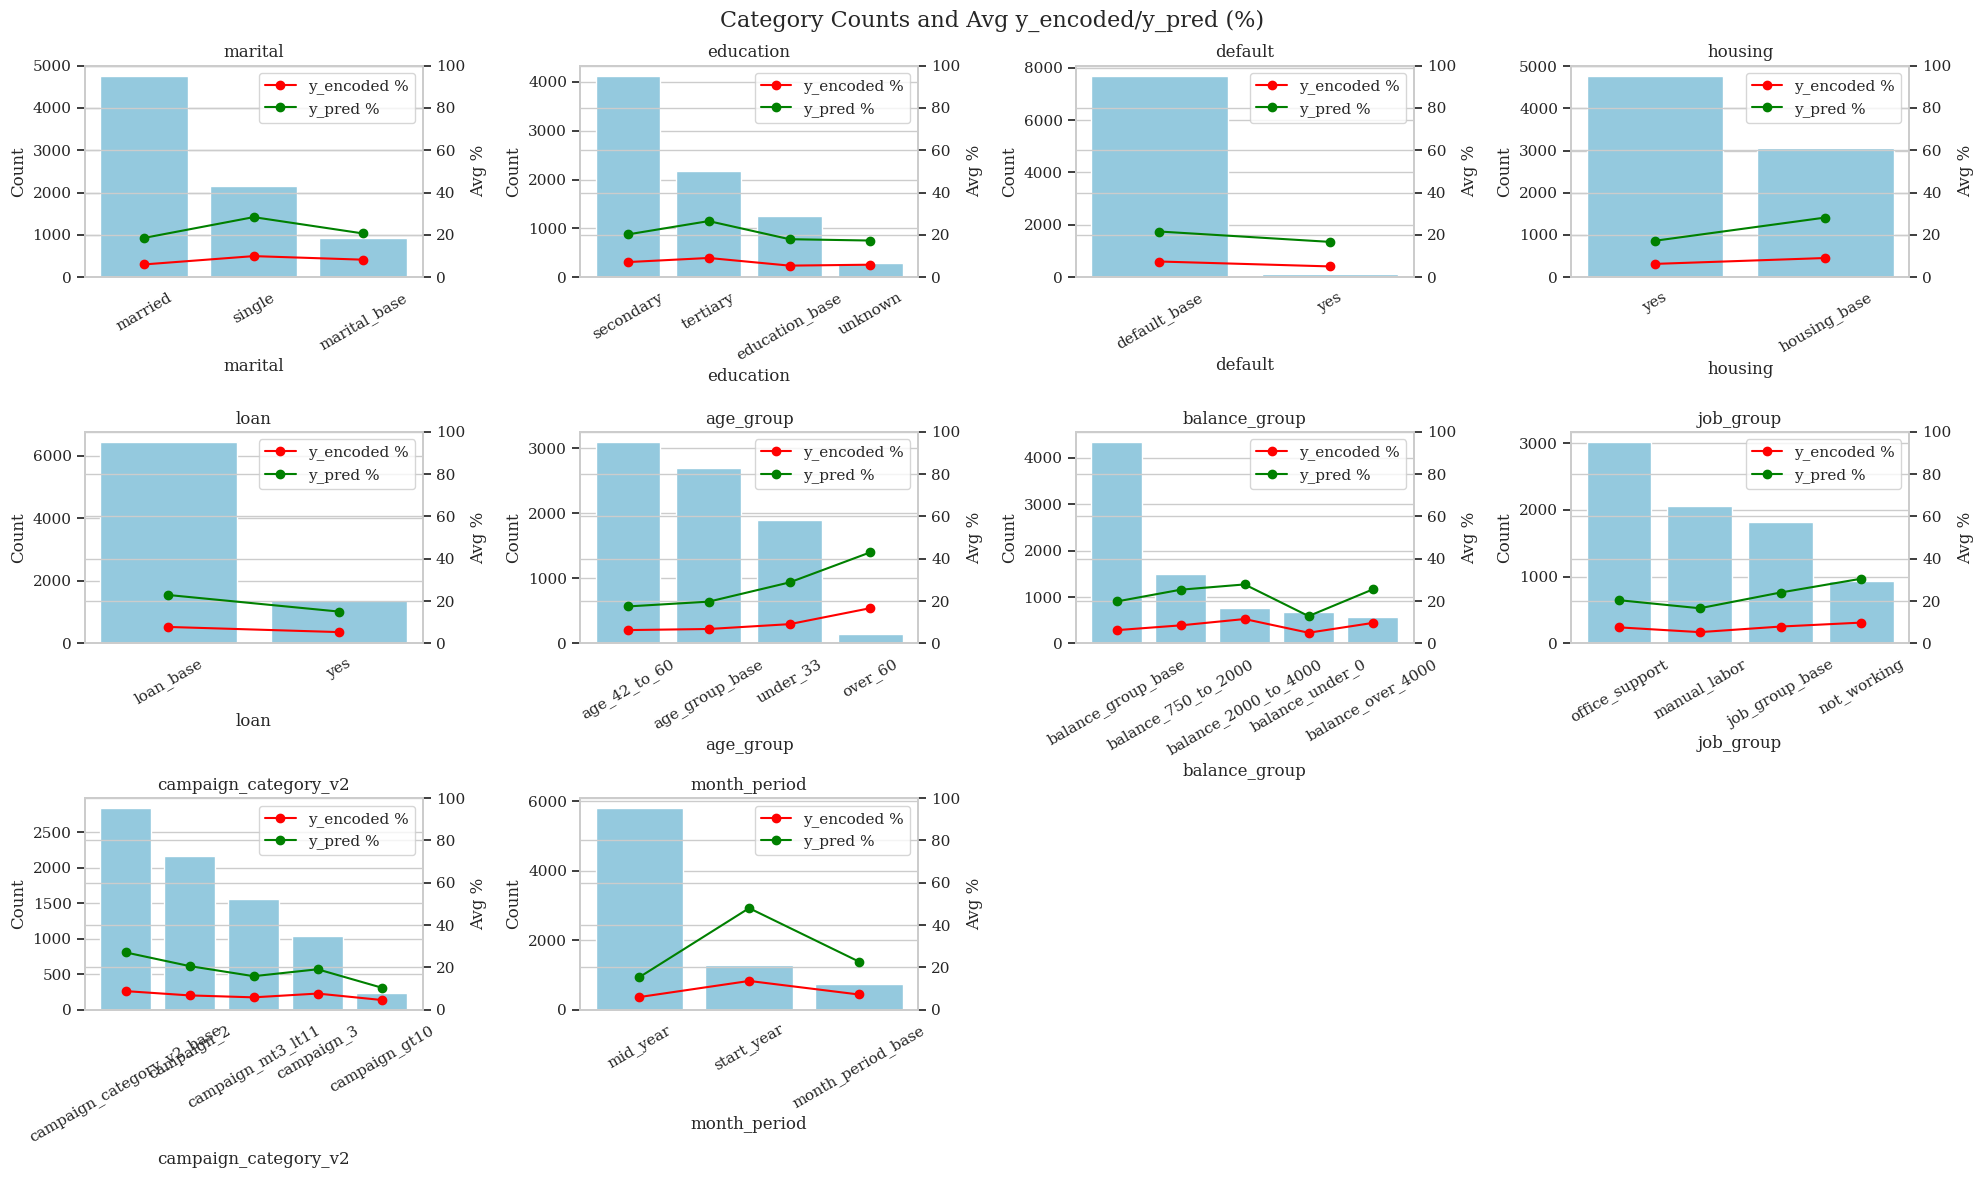

In [62]:
import math

# Define mapping from dummy columns to original categorical features
cat_groups = {
    'marital': ['marital_married', 'marital_single'],
    'education': ['education_secondary', 'education_tertiary', 'education_unknown'],
    'default': ['default_yes'],
    'housing': ['housing_yes'],
    'loan': ['loan_yes'],
    'age_group': ['age_group_age_42_to_60', 'age_group_over_60', 'age_group_under_33'],
    'balance_group': [
        'balance_group_balance_2000_to_4000',
        'balance_group_balance_750_to_2000',
        'balance_group_balance_over_4000',
        'balance_group_balance_under_0'
    ],
    'job_group': ['job_group_manual_labor', 'job_group_not_working', 'job_group_office_support'],
    'campaign_category_v2': [
        'campaign_category_v2_campaign_2',
        'campaign_category_v2_campaign_3',
        'campaign_category_v2_campaign_gt10',
        'campaign_category_v2_campaign_mt3_lt11'
    ],
    'month_period': ['month_period_mid_year', 'month_period_start_year']
}

# Helper function to convert dummies back to categorical
def dummies_to_category(row, group, columns):
    for col in columns:
        if row[col]:
            return col.replace(f"{group}_", "")
    return f"{group}_base"

# Create a copy to avoid modifying original
df_cat = test_data.copy()

# Convert dummies to categorical columns
for group, columns in cat_groups.items():
    df_cat[group] = df_cat.apply(lambda row: dummies_to_category(row, group, columns), axis=1)

# Prepare for plotting
cat_features = list(cat_groups.keys())
n_features = len(cat_features)
ncols = math.ceil(math.sqrt(n_features))
nrows = math.ceil(n_features / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows), constrained_layout=True)
axes = axes.flatten()

for idx, feature in enumerate(cat_features):
    ax = axes[idx]
    # Bar plot: count of each category
    order = df_cat[feature].value_counts().index
    sns.countplot(data=df_cat, x=feature, order=order, ax=ax, color='skyblue')
    ax.set_ylabel('Count')
    ax.set_title(f'{feature}')
    # ax.set_xlabel(feature)
    ax.tick_params(axis='x', rotation=30)
    
    # Calculate mean y_encoded and y_pred per category
    avg_stats = df_cat.groupby(feature)[['y_encoded', 'y_pred']].mean() * 100
    avg_stats = avg_stats.loc[order]
    
    # Line plot: average y_encoded and y_pred (percent)
    ax2 = ax.twinx()
    ax2.plot(order, avg_stats['y_encoded'], color='red', marker='o', label='y_encoded %')
    ax2.plot(order, avg_stats['y_pred'], color='green', marker='o', label='y_pred %')
    ax2.set_ylabel('Avg %')
    ax2.set_ylim(0, 100)
    ax2.legend(loc='upper right')

# Hide any unused subplots
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])


plt.suptitle('Category Counts and Avg y_encoded/y_pred (%)', fontsize=16)
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.tight_layout()
plt.show()

C:\Users\samar\AppData\Local\Temp\ipykernel_8988\3031185334.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=test_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')


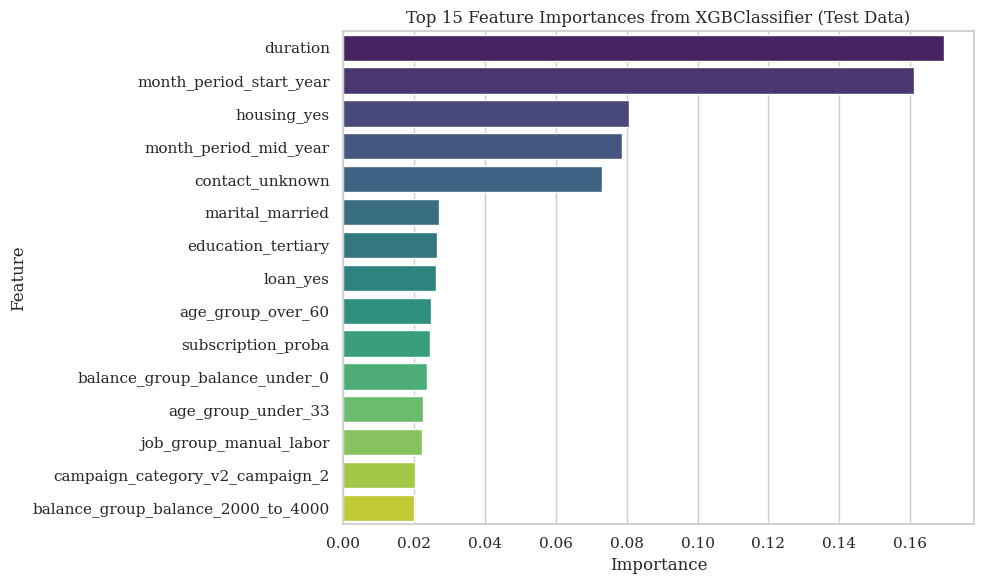

In [64]:
# Get feature importances from the trained XGBClassifier model for test_data
test_feature_importances = xgb_cls_loaded.feature_importances_
test_feature_names = test_X.columns

# Create a DataFrame for visualization
test_feat_imp_df = pd.DataFrame({
    'feature': test_feature_names,
    'importance': test_feature_importances
}).sort_values(by='importance', ascending=False)

# Plot the top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=test_feat_imp_df.head(15), x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importances from XGBClassifier (Test Data)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()